## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

## Load Dataset

In [2]:
IMG_SIZE = 320
BATCH_SIZE = 16
data_path = r"C:\Users\HP\Downloads\ChessCNN\Chessman-image-dataset\Chess"

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
train_data = train_gen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 442 images belonging to 6 classes.


In [4]:
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_data = val_gen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 109 images belonging to 6 classes.


## Build Model (320 x 320)

In [5]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(320,320,3)
)

for layer in base_model.layers[:-20]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax')
])

## Compile

In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
print(model.input_shape)

(None, 320, 320, 3)


## Train Model

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12
)

Epoch 1/12


28/28 [==============================] - 34s 1s/step - loss: 2.3066 - accuracy: 0.3778 - val_loss: 0.5903 - val_accuracy: 0.7982
Epoch 2/12
28/28 [==============================] - 29s 1s/step - loss: 0.6541 - accuracy: 0.7557 - val_loss: 0.4379 - val_accuracy: 0.8165
Epoch 3/12
28/28 [==============================] - 29s 1s/step - loss: 0.5100 - accuracy: 0.8167 - val_loss: 0.3456 - val_accuracy: 0.8807
Epoch 4/12
28/28 [==============================] - 32s 1s/step - loss: 0.3605 - accuracy: 0.8710 - val_loss: 0.4171 - val_accuracy: 0.8165
Epoch 5/12
28/28 [==============================] - 31s 1s/step - loss: 0.3104 - accuracy: 0.8982 - val_loss: 0.2277 - val_accuracy: 0.8991
Epoch 6/12
28/28 [==============================] - 34s 1s/step - loss: 0.1975 - accuracy: 0.9367 - val_loss: 0.4981 - val_accuracy: 0.8532
Epoch 7/12
28/28 [==============================] - 30s 1s/step - loss: 0.1896 - accuracy: 0.9276 - val_loss: 0.3665 - val_accuracy: 0.8899
Epoch 8/12
28/28 [

## Save and Verify Model

In [9]:
model.save("chess_model_320.h5")
print("Model Saved")

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved


In [10]:
test_model = tf.keras.models.load_model("chess_model_320.h5")
print(test_model.input_shape)

(None, 320, 320, 3)


## Accuracy and Loss Graph

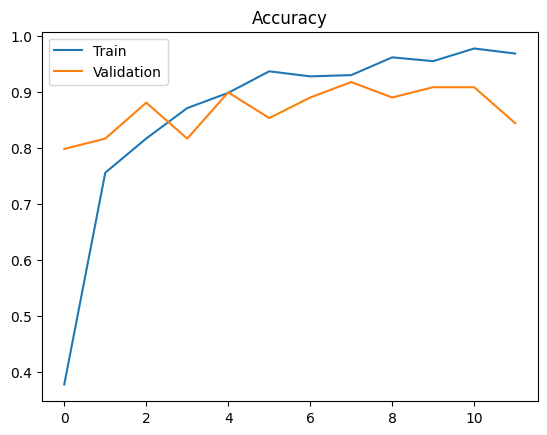

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Accuracy")
plt.show()

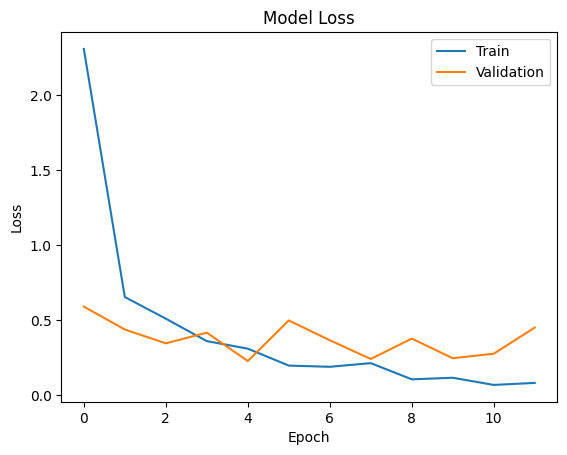

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## Confussion Matrix

Found 551 images belonging to 6 classes.
35/35 [==============================] - 20s 525ms/step


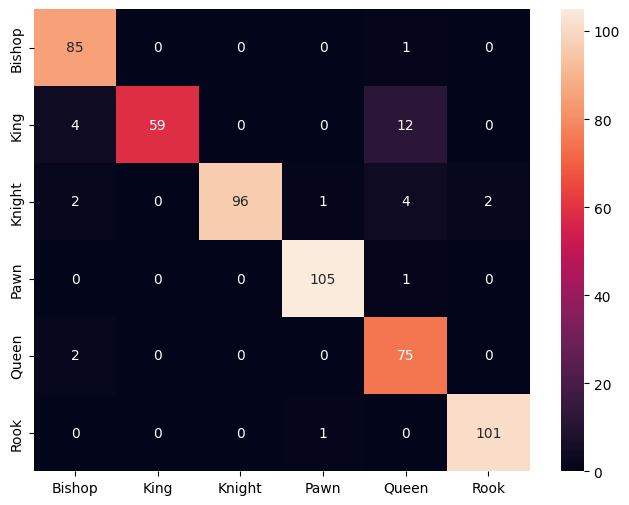

In [13]:
val_eval = ImageDataGenerator(rescale=1./255)
val_eval = val_eval.flow_from_directory(
    data_path,
    target_size=(320,320),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)
predictions = model.predict(val_eval)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_eval.classes
labels = list(val_eval.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=labels,
    yticklabels=labels
)
plt.show()

In [15]:
## Classification Report
print(classification_report(
    true_classes,
    predicted_classes,
    target_names=labels
))

              precision    recall  f1-score   support

      Bishop       0.91      0.99      0.95        86
        King       1.00      0.79      0.88        75
      Knight       1.00      0.91      0.96       105
        Pawn       0.98      0.99      0.99       106
       Queen       0.81      0.97      0.88        77
        Rook       0.98      0.99      0.99       102

    accuracy                           0.95       551
   macro avg       0.95      0.94      0.94       551
weighted avg       0.95      0.95      0.95       551

